# prepocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()# this returns 2 tuples ie.1st tuple for training and 2nd for testing..

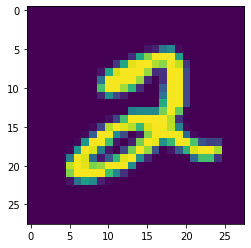

In [5]:
plt.imshow(x_train[5])

In [6]:
x_train.shape #dataset contains 60000 images with 2-D shape of (28,28)

(60000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train.max()   #255 is very large pixel so we have to do scaling to minize between 0-1..to get better accuracy...

255

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

since CNN takes 3-D inputs rather than 2-D inputs..

In [10]:

x_train =x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)

In [11]:
x_train[5].shape  #3-D image since mnist is a grayscale dataset..so we use only one channel


(28, 28, 1)

In [12]:
input_shape = x_train[0].shape

# building a model..

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape ))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))  #filter size = 2*2, stride = 2*2
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation ='relu')) #adding hidden layer 1..
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))#adding output layer..and we should always use 'softmax' for >2 outputs..

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [15]:
model.compile(optimizer='adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
#"sparse_categorical_crossentropy" -- efficient for more than 2 classes of output..as both "categorical_crossentropy" and
#   "sparse_categorical_crossentropy" uses one hot encoding..

In [16]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1, validation_data = (x_test,y_test))

Epoch 1/10
469/469 [==============================] - 98s 209ms/step - loss: 0.2490 - accuracy: 0.9242 - val_loss: 0.0508 - val_accuracy: 0.9840
Epoch 2/10
469/469 [==============================] - 98s 208ms/step - loss: 0.0883 - accuracy: 0.9740 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 3/10
469/469 [==============================] - 97s 208ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0323 - val_accuracy: 0.9893
Epoch 4/10
469/469 [==============================] - 97s 208ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0304 - val_accuracy: 0.9901
Epoch 5/10
469/469 [==============================] - 98s 209ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 98s 209ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0310 - val_accuracy: 0.9895
Epoch 7/10
469/469 [==============================] - 98s 208ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0286 - val_ac

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0275 - accuracy: 0.9920


[0.02745167165994644, 0.9919999837875366]

In [18]:
history.history

{'loss': [0.24335092306137085,
  0.08764147013425827,
  0.06473904848098755,
  0.05463897064328194,
  0.04634540528059006,
  0.03855571150779724,
  0.03475488722324371,
  0.031213462352752686,
  0.030067583546042442,
  0.024925976991653442],
 'accuracy': [0.9257500171661377,
  0.974049985408783,
  0.980733335018158,
  0.9835333228111267,
  0.9860000014305115,
  0.98785001039505,
  0.9886999726295471,
  0.9893166422843933,
  0.9901999831199646,
  0.9914833307266235],
 'val_loss': [0.04947130009531975,
  0.04384839907288551,
  0.03299369663000107,
  0.02867371216416359,
  0.027491793036460876,
  0.02827577292919159,
  0.027208451181650162,
  0.03107243962585926,
  0.02580404095351696,
  0.0297620240598917],
 'val_accuracy': [0.9839000105857849,
  0.9848999977111816,
  0.9889000058174133,
  0.9901999831199646,
  0.9904999732971191,
  0.9907000064849854,
  0.9912999868392944,
  0.9908999800682068,
  0.9925000071525574,
  0.9915000200271606]}

In [29]:
def plot_learningCurve(history, epochs):
    #plot a traing and validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train','val'], loc ='lower right')
    plt.show()
    
    #plot training and validatio values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train','val'], loc ='upper right')
    plt.show()

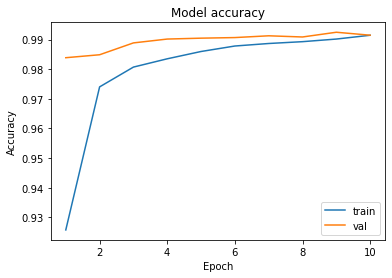

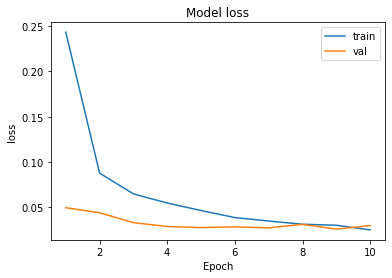

In [30]:
plot_learningCurve(history, 10)

# Saving our model

In [25]:
model.save('MNIST CNN.h5')   #we can also save without ".h5" extension

# loading model

In [2]:
import tensorflow
from tensorflow.keras.models import load_model


ModuleNotFoundError: No module named 'tensorflow'

In [48]:
Model = load_model('saved models/MNIST CNN.h5')

In [49]:
Model.compile(optimizer='adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [84]:
test = x_test[85].reshape(1,28,28,1)

In [83]:
y_test[85]

4

In [85]:
np.argmax(Model.predict(test), axis=-1)

array([2], dtype=int64)

In [77]:
Model.predict(test)  #it is in probability form...

array([[0.09526694, 0.10064743, 0.10415846, 0.09786259, 0.10105998,
        0.11260466, 0.09806671, 0.10023913, 0.09117437, 0.09891976]],
      dtype=float32)